# Datensatz runterladen

In [1]:
download = False

In [2]:
if download:
    import urllib.request
    fname = "gtsrb.zip"
    URL = "http://www.juergenbrauer.org/datasets/" + fname
    urllib.request.urlretrieve(URL, fname)

# Datensatz entpacken

In [3]:
if download:
    import shutil
    shutil.unpack_archive(fname, ".")

# Datensatz für das Training und Testen vorbereiten

In [4]:
# !pip install torch

In [5]:
!pip show torch

Name: torch
Version: 2.1.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchvision


In [6]:
import torch
torch.__version__

'2.1.0+cu121'

In [7]:
!pip show torchvision

Name: torchvision
Version: 0.16.0
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/juebrauer/miniconda3/envs/env_ws23/lib/python3.11/site-packages
Requires: numpy, pillow, requests, torch
Required-by: 


In [8]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

folder = "/home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/"
train_dataset = datasets.ImageFolder(root=f"{folder}/train", transform=transform)

In [9]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 39209
    Root location: /home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb//train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [10]:
train_dataset.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [11]:
len(train_dataset.classes)

43

In [12]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=32,
                                           shuffle=True)

In [13]:
train_loader

In [14]:
train_loader.batch_size

32

In [15]:
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 39209
    Root location: /home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb//train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [16]:
for images, labels in train_loader:
    print(images.shape)
    print(labels)
    break

torch.Size([32, 3, 224, 224])
tensor([ 6, 11, 34, 25, 40,  9, 38, 15,  4, 26,  1,  5, 39, 38, 12, 12, 29,  9,
        30, 34,  5, 42, 41, 15, 41, 10,  1, 18,  5, 34, 32,  2])


In [17]:
images[0].shape

torch.Size([3, 224, 224])

In [18]:
images[0].numpy().transpose((1,2,0))

array([[[0.1882353 , 0.18431373, 0.16862746],
        [0.18431373, 0.18431373, 0.16862746],
        [0.18039216, 0.18431373, 0.16862746],
        ...,
        [0.19607843, 0.19607843, 0.20392157],
        [0.19607843, 0.2       , 0.20392157],
        [0.2       , 0.2       , 0.20784314]],

       [[0.1882353 , 0.18431373, 0.16862746],
        [0.18431373, 0.18431373, 0.16862746],
        [0.18039216, 0.18431373, 0.16862746],
        ...,
        [0.1882353 , 0.1882353 , 0.19215687],
        [0.1882353 , 0.1882353 , 0.19215687],
        [0.1882353 , 0.1882353 , 0.19215687]],

       [[0.18431373, 0.18039216, 0.16862746],
        [0.18039216, 0.18039216, 0.16862746],
        [0.1764706 , 0.18039216, 0.16862746],
        ...,
        [0.19215687, 0.19215687, 0.19607843],
        [0.19215687, 0.19215687, 0.19607843],
        [0.19215687, 0.19215687, 0.19607843]],

       ...,

       [[0.17254902, 0.16470589, 0.16078432],
        [0.17254902, 0.16470589, 0.16078432],
        [0.17254902, 0

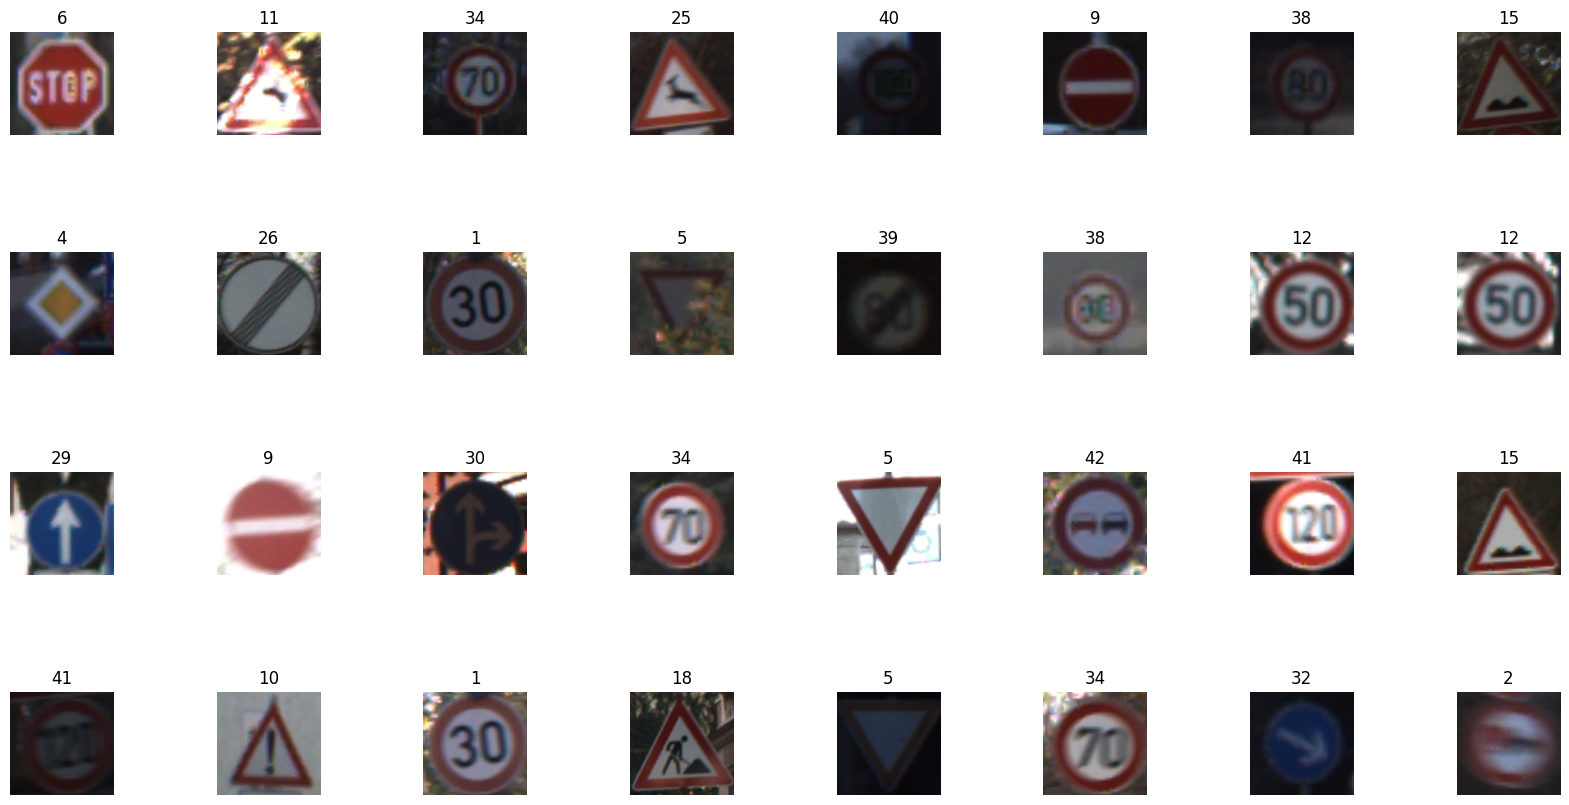

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))  # Breite und Höhe in Zoll anpassen

for i in range(1,33):
    import matplotlib.pyplot as plt
    img = images[i-1].numpy().transpose((1,2,0))
    
    plt.subplot(4, 8, i)    
    plt.imshow(img)    
    plt.title(f"{labels[i-1]}")
    plt.axis("off")

plt.subplots_adjust(hspace=1.0, wspace=1.0)
plt.show()    

# Ein CNN-Modell in PyTorch definieren

In [2]:
import torch
import torch.nn as nn

class CNN4TSRecognition(nn.Module):

    def __init__(self):
        super(CNN4TSRecognition, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        self.relu3 = nn.ReLU()

        self.flatten = nn.Flatten()

        with torch.no_grad():
            self.build_classifier(torch.rand(1, 3, 224, 224))
        

    def build_classifier(self, x):

        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        
        input_dim = x.size(1)
        output_dim = 43
        
        self.fc1 = nn.Linear(input_dim, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, output_dim)

    def forward(self, x):
        # Feature hierarchy
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)

        # Classifier
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)

        # Output-Tensor zurückliefern
        return x
        

# CNN Modell erstellen und trainieren

In [21]:
len(train_dataset)

39209

In [22]:
train_loader.batch_size

32

In [23]:
len(train_dataset) / train_loader.batch_size

1225.28125

In [24]:
len(train_loader)

1226

Trainingsepoche #1 / 1 startet.
	Batch #50 / 1226
	Batch #100 / 1226
	Batch #150 / 1226
	Batch #200 / 1226
	Batch #250 / 1226
	Batch #300 / 1226
	Batch #350 / 1226
	Batch #400 / 1226
	Batch #450 / 1226
	Batch #500 / 1226
	Batch #550 / 1226
	Batch #600 / 1226
	Batch #650 / 1226
	Batch #700 / 1226
	Batch #750 / 1226
	Batch #800 / 1226
	Batch #850 / 1226
	Batch #900 / 1226
	Batch #950 / 1226
	Batch #1000 / 1226
	Batch #1050 / 1226
	Batch #1100 / 1226
	Batch #1150 / 1226
	Batch #1200 / 1226
Trainingsepoche #1 / 1 beendet. Benötigte Zeit: start=2023-11-20 18:31:48.319332, stop=2023-11-20 18:34:26.213092, Dauer: 0:02:37.893760


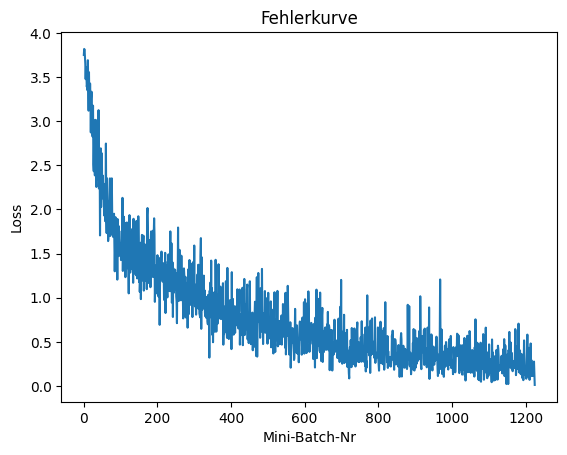

In [25]:
from datetime import datetime

device = torch.device("cuda" if torch.cuda.is_available else "cpu")

model = CNN4TSRecognition().to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # TODO: Experimentiere hier mit der Lernrate!

num_epochs = 1

losses = []


model.train()
for epoch in range(1, num_epochs+1):

    start = datetime.now()

    print(f"Trainingsepoche #{epoch} / {num_epochs} startet.")

    batch_nr = 1
    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        if batch_nr % 50 == 0:
            print(f"\tBatch #{batch_nr} / {len(train_loader)}")

        outputs = model(images)

        loss = criterion(outputs, labels)

        losses.append( loss.item() )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_nr += 1

    stop = datetime.now()

    print(f"Trainingsepoche #{epoch} / {num_epochs} beendet. Benötigte Zeit: start={start}, stop={stop}, Dauer: {stop-start}")



plt.plot(losses)
plt.xlabel("Mini-Batch-Nr")
plt.ylabel("Loss")
plt.title("Fehlerkurve")
plt.show()

In [ ]:
loss.item()

# Check, ob eine GPU verfügbar ist

In [ ]:
torch.cuda.is_available()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
device

# Testdatensatz aufbereiten

In [ ]:
folder

In [ ]:
import os

for i in range(0,43):
    newfolder = folder + f"/test_subfolders/{i}"    
    if not os.path.exists(newfolder):
        os.makedirs(newfolder)

In [ ]:
import pandas
t = pandas.read_csv(folder+"Test.csv")
t

In [ ]:
t.query("Path == 'Test/09771.png'")["ClassId"].values[0]

In [ ]:
import shutil
all_test_image_files = os.listdir(folder+"/test")
nr_errors = 0

counters = {id:0 for id in range(0,43)}

for image_file in all_test_image_files:
    try:
        id = t.query(f"Path == 'Test/{image_file}'")["ClassId"].values[0]
        #print(f"{image_file} --> {id}")
        src = f"{folder}/test/{image_file}"
        dst = f"{folder}/test_subfolders/{id}"
        shutil.copy(src,dst)
        counters[id] += 1
    except:
        nr_errors += 1
        print(f"Error {nr_errors}! Ich kann für Datei {image_file} keinen Eintrag in der csv-Tabelle finden!")

In [ ]:
folder

In [ ]:
!cat /home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/test/GT-final_test.csv

In [ ]:
counters

# Das fertig trainierte CNN speichern

In [26]:
torch.save(model, 'modell.pth')

In [27]:
import pickle
datei = open("modell.pkl", "wb")
pickle.dump(model, datei)
datei.close()

In [28]:
torch.save(model.state_dict(), 'modell_state.pth')

# Das gespeicherte CNN wiederherstellen

In [3]:
import pickle
datei = open("modell.pkl", "rb")
model = pickle.load(datei)
datei.close()

In [4]:
model

CNN4TSRecognition(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu2): ReLU()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=43, bias=True)
)

# Testfunktion

In [7]:
folder = "/home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb"
f"{folder}/test_subfolders"

'/home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/test_subfolders'

In [10]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

test_dataset = datasets.ImageFolder(root=f"{folder}/test_subfolders", transform=transform)

In [11]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 12630
    Root location: /home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/test_subfolders
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [12]:
len(test_dataset.classes)

43

In [14]:
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=32,
                                          shuffle=False)

In [15]:
len(test_loader)

395

In [16]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 12630
    Root location: /home/juebrauer/link_to_vcd/07_datasets/36_gtsrb/gtsrb/test_subfolders
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")




In [36]:
accuracy = (correct/total)*100.0
print(f"acc={accuracy:.2f} %")

acc=79.35 %


In [25]:
predicted

tensor([ 1,  1,  1,  1,  1,  1,  0, 12, 34,  1,  0, 34,  1,  1, 34,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  1,  1, 12, 34,  1,  1, 12,  1],
       device='cuda:0')

In [26]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [30]:
(predicted == labels).sum().item()

9

In [33]:
labels.shape[0]

32

In [38]:
(1/43)*100

2.3255813953488373